In [32]:
import urllib.request, urllib.parse, urllib.error
import requests
import json

In [44]:
# open json containing api key
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['api_key']

In [45]:
# define full url
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

In [53]:
# print keys in json file
def print_json(json_data):
    list_keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
                'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings',
                'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print('-'*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")

In [59]:
# save poster image
def save_poster(json_data):
    import os
    # save title for naming image
    title = json_data['Title']
    # pull poster image
    poster_url = json_data['Poster']
    # keeps same file extension type
    poster_file_extension = poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
    # save poster in "Posters" folder in current directory
    savelocation = os.getcwd()+'/'+'Posters'+'/'
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
       # name file with title and keep current extension 
    filename = savelocation + str(title) + '.' + poster_file_extension
    f = open(filename, 'wb')
    f.write(poster_data)
    f.close()

In [60]:
def search_movie(title):
    try:
        # pulls together full url with apikey
        url = serviceurl + urllib.parse.urlencode({'t':str(title)})+ apikey
        #displays message for user 
        print(f'Retrieving the data of "{title}" now...')
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data = json.loads(data)
        
        if json_data['Response']=='True':
            # display json data using print_json function
            print_json(json_data)
            # save poster using save_poster function, only if poster exists
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            # display specific error message for user 
            print('Error encountered:', json_data['Error'])
    except urllib.error.URLError as e:
        print(f'Error: {e.reason}')

In [61]:
# check for functionality
search_movie('Titanic')

Retrieving the data of "Titanic" now...
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico, Australia, Canada
Awards: Won 11 Oscars. Another 112 wins & 83 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,029,426
imdbID: tt0120338


In [62]:
# check for error message functionality
search_movie('Random Error')

Retrieving the data of "Random Error" now...
Error encountered: Movie not found!


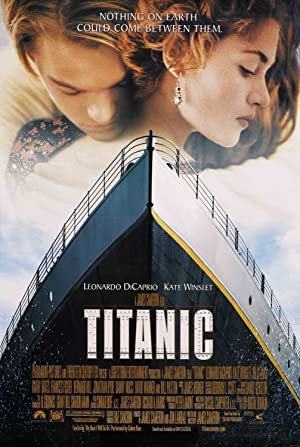

In [58]:
# display saved poster image
from IPython.display import Image
Image(filename='Posters/Titanic.jpg') 